In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Uploading the images 

In [ ]:
#Uploading image data
from google.colab import files
data_to_load = files.upload()

Saving image.npz to image.npz


uploading the labels file

In [ ]:
#Uploading labels data
from google.colab import files
label_to_load = files.upload()

Saving labels.csv to labels.csv


Loading and reading the data 

In [ ]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)

Q    550
C    550
U    550
X    550
F    550
R    550
Y    550
K    550
H    550
G    550
A    550
B    550
L    550
I    550
N    550
T    550
V    550
P    550
D    550
Z    550
E    550
J    550
M    550
W    550
S    550
O    550
Name: labels, dtype: int64


 Explore how the samples look like.

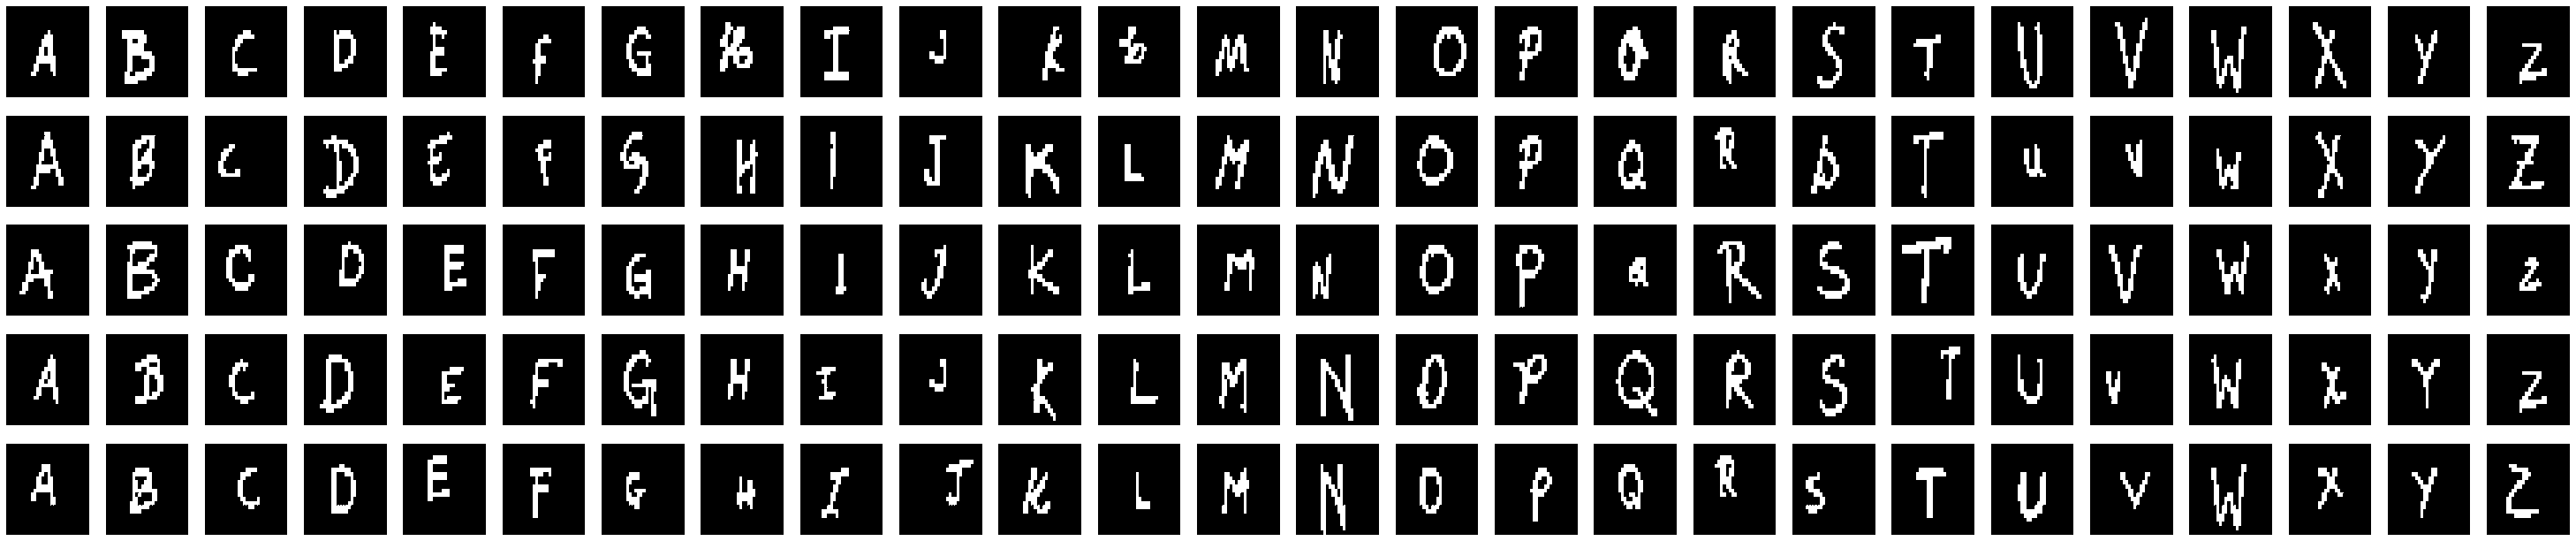

In [ ]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

printing the number of images and its size.

In [ ]:
print(len(X))
print(len(X[0]))

14300
660


checking the array of a particular image

In [ ]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

scaling the data by dividing  it by 255 so that all the features of an image could be represented with values between 0 and 1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=7500, test_size=2500)

#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

Training the logistics regression model with the data

In [ ]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Checking how the model perfroms

In [ ]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9952


checking how the model looks on  the confusion matrix

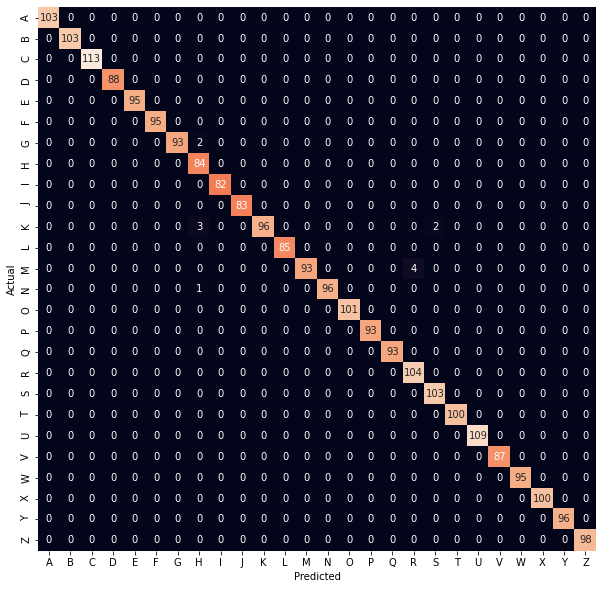

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)